## Chapter10 통계적 추정 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])

In [3]:
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

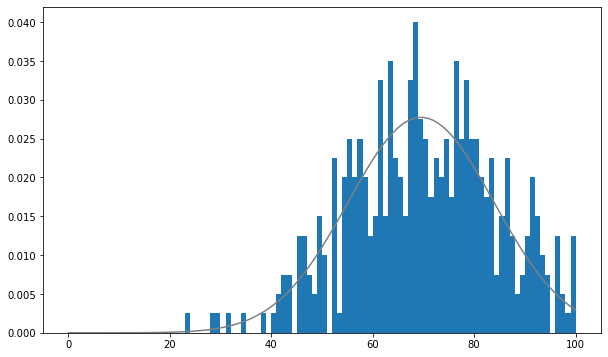

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [6]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [7]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n)) #샘플1만개 만든다. 

## 10.1 점추정
- 어떻게 표본평균을 사용하면 모평균을 잘 추정할 수 있는지, 모분산을 점추정할때 어떤 통계량을 사용하면 잘 추정할 수 있는지를 설명합니다. 

## 10.1.1 모평균의 점추정

In [10]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


### '추정량의 기대값'이 추측하려는 모수가 되는 성질을 '불편성(unbiasedness)'이라 하고, 불편성을 가진 추정량을 '불편추정량(unbiased estimator)'이라고 합니다. 

In [13]:
samples.shape

(10000, 20)

In [14]:
sample_means = np.mean(samples, axis=1)
print(sample_means.shape)
np.mean(sample_means)

(10000,)


69.53799999999998

### 표본크기n을 증가시키면, 추측하기 원하는 모수에 수렴해가는 성질입니다. 이 성질을 '일치성(consistenncy)'이라 하고, 일치성을 지닌 추정량을 '일치추정량(consistent estimator)'이라고 합니다. 

In [12]:
np.mean(np.random.choice(scores, int(1e6)))

69.542954

### 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에, 모평균을 잘 추정한다고 말할 수 있습니다. 이 책에서는 불편성과 일치성을 지닌 추정량을 좋은 추정량이라고 부르겠습니다. 

In [15]:
s_mean = np.mean(sample)
s_mean

70.4

## 10.1.2 모분산의 점추정
### - 표본분산은 모분산의 불편추정량이 아님. 
### - 모분산의 불편추정량이 되는 표본통계량은 '불편분산(unbiased variance)'입니다. 

In [16]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [18]:
# 모분산은 206인데 작은 숫자임! 
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.34417850000003

In [20]:
#불편분산 계산 
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

In [21]:
# 불편분산은 모분산에 대해 불편성과 일치성을 지닌 좋은 추정량임. 
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.08336592317

In [22]:
# A학생이 추출한 표본으로 불편분산을 계산해둡니다. 
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

## 10.1.3 정리

#### 불편성: 기대값이 추측하기 원하는 모수가 되는 성질
#### 일치성: 표본 크기를 키우면 추측하기 원하는 모수에 수렴하는 성질

### < 모평균과 모분산의 점추정 >
#### $X_{1}, X_{2}, ... , X_{n}$이 서로 독립이고 기대값이 $\mu$, 분산이 $\sigma^{2}$인 확률분포를 따를 때, 표본평균 $\bar{X}$와 불편분산$s^{2}$는 각각 모평균$\mu$와 모분산$\sigma^{2}$에 대해서 불편성과 일치성을 지닌 추정량이 됩니다. 